In [1]:
import csv as csv 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read Jobs Data 
Jobs_Data= pd.read_csv("Jobs_in_data.csv")
print(Jobs_Data.head())

   work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   
2       2023        Data Architect  Data Architecture and Modeling   
3       2023        Data Scientist       Data Science and Research   
4       2023        Data Scientist       Data Science and Research   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany        Mid-level   
1             USD  186000         186000      United States           Senior   
2             USD   81800          81800      United States           Senior   
3             USD  212000         212000      United States           Senior   
4             USD   93300          93300      United States           Senior   

  employment_type work_setting company_location company_size  
0       Full-time       Hybrid     

# Data Cleaning

In [25]:
# Filter year to only 2023
FJ_Data = Jobs_Data[Jobs_Data['work_year'] == 2023]
print(FJ_Data.head())

# Check last 5 rows as verification
print(FJ_Data.tail())

   work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   
2       2023        Data Architect  Data Architecture and Modeling   
3       2023        Data Scientist       Data Science and Research   
4       2023        Data Scientist       Data Science and Research   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany        Mid-level   
1             USD  186000         186000      United States           Senior   
2             USD   81800          81800      United States           Senior   
3             USD  212000         212000      United States           Senior   
4             USD   93300          93300      United States           Senior   

  employment_type work_setting company_location company_size  
0       Full-time       Hybrid     

In [26]:
# Filter employee residence to only US
ER_Data= FJ_Data[FJ_Data['employee_residence'] == 'United States']

# Check first 5 rows as verification
print(ER_Data.head())

   work_year       job_title                    job_category salary_currency  \
1       2023  Data Architect  Data Architecture and Modeling             USD   
2       2023  Data Architect  Data Architecture and Modeling             USD   
3       2023  Data Scientist       Data Science and Research             USD   
4       2023  Data Scientist       Data Science and Research             USD   
5       2023  Data Scientist       Data Science and Research             USD   

   salary  salary_in_usd employee_residence experience_level employment_type  \
1  186000         186000      United States           Senior       Full-time   
2   81800          81800      United States           Senior       Full-time   
3  212000         212000      United States           Senior       Full-time   
4   93300          93300      United States           Senior       Full-time   
5  130000         130000      United States           Senior       Full-time   

  work_setting company_location compan

In [6]:
# Rename necessary columns
ER_Data=ER_Data.rename(columns={'employee_residence': 'Country'})
print(ER_Data.head())

   work_year       job_title                    job_category salary_currency  \
1       2023  Data Architect  Data Architecture and Modeling             USD   
2       2023  Data Architect  Data Architecture and Modeling             USD   
3       2023  Data Scientist       Data Science and Research             USD   
4       2023  Data Scientist       Data Science and Research             USD   
5       2023  Data Scientist       Data Science and Research             USD   

   salary  salary_in_usd        Country experience_level employment_type  \
1  186000         186000  United States           Senior       Full-time   
2   81800          81800  United States           Senior       Full-time   
3  212000         212000  United States           Senior       Full-time   
4   93300          93300  United States           Senior       Full-time   
5  130000         130000  United States           Senior       Full-time   

  work_setting company_location company_size  
1    In-person 

In [7]:
# Drop salary_in_usd since it is repetitive
ER_Data= ER_Data.drop(columns={'salary_in_usd'})
print(ER_Data.head())

   work_year       job_title                    job_category salary_currency  \
1       2023  Data Architect  Data Architecture and Modeling             USD   
2       2023  Data Architect  Data Architecture and Modeling             USD   
3       2023  Data Scientist       Data Science and Research             USD   
4       2023  Data Scientist       Data Science and Research             USD   
5       2023  Data Scientist       Data Science and Research             USD   

   salary        Country experience_level employment_type work_setting  \
1  186000  United States           Senior       Full-time    In-person   
2   81800  United States           Senior       Full-time    In-person   
3  212000  United States           Senior       Full-time    In-person   
4   93300  United States           Senior       Full-time    In-person   
5  130000  United States           Senior       Full-time       Remote   

  company_location company_size  
1    United States            M  
2    U

In [27]:
# Drop salary_currency and company_location since it is repetitive
ER_Data = ER_Data.drop(columns={'salary_currency', 'company_location'})
print(ER_Data.head())

   work_year       job_title                    job_category  salary  \
1       2023  Data Architect  Data Architecture and Modeling  186000   
2       2023  Data Architect  Data Architecture and Modeling   81800   
3       2023  Data Scientist       Data Science and Research  212000   
4       2023  Data Scientist       Data Science and Research   93300   
5       2023  Data Scientist       Data Science and Research  130000   

   salary_in_usd employee_residence experience_level employment_type  \
1         186000      United States           Senior       Full-time   
2          81800      United States           Senior       Full-time   
3         212000      United States           Senior       Full-time   
4          93300      United States           Senior       Full-time   
5         130000      United States           Senior       Full-time   

  work_setting company_size  
1    In-person            M  
2    In-person            M  
3    In-person            M  
4    In-person

### Breakdown of Data

In [8]:
#BM - Breakdown of Job Categories

category_count = (ER_Data["job_category"]).value_counts()
category_count

Data Science and Research         2179
Data Engineering                  1527
Machine Learning and AI           1035
Data Analysis                      975
Leadership and Management          369
BI and Visualization               285
Data Architecture and Modeling     189
Data Management and Strategy        44
Data Quality and Operations         38
Cloud and Database                   3
Name: job_category, dtype: int64

In [9]:
#BM - Breakdown of Experience Levels

experience_count = (ER_Data["experience_level"]).value_counts()
experience_count

Senior         5071
Mid-level      1124
Entry-level     245
Executive       204
Name: experience_level, dtype: int64

In [10]:
#BM - Breakdown of Work Settings

setting_count = (ER_Data["work_setting"]).value_counts()
setting_count

In-person    4553
Remote       2082
Hybrid          9
Name: work_setting, dtype: int64

In [11]:
#BM - Minimum Salary for All Jobs

overall_salary_min = (ER_Data["salary"].min())
overall_salary_min

24000

In [12]:
#BM - Maximum Salary for All Jobs

overall_salary_max = (ER_Data["salary"].max())
overall_salary_max

405000

In [13]:
#BM - Mean Salary for All Jobs

overall_salary_mean = (ER_Data["salary"].mean())
overall_salary_mean

160781.6878386514

In [14]:
#BM - Minimum Salary for Each Job Category

min_salary = ER_Data.groupby(["job_category"])["salary"].min()
min_salary

job_category
BI and Visualization               44100
Cloud and Database                115000
Data Analysis                      36000
Data Architecture and Modeling     52500
Data Engineering                   50000
Data Management and Strategy       46400
Data Quality and Operations        44640
Data Science and Research          24000
Leadership and Management          38000
Machine Learning and AI            25500
Name: salary, dtype: int64

In [15]:
#BM - Maximum Salary for Each Job Category

max_salary = ER_Data.groupby(["job_category"])["salary"].max()
max_salary

job_category
BI and Visualization              259900
Cloud and Database                170000
Data Analysis                     385000
Data Architecture and Modeling    376080
Data Engineering                  385000
Data Management and Strategy      250000
Data Quality and Operations       289120
Data Science and Research         405000
Leadership and Management         350000
Machine Learning and AI           392000
Name: salary, dtype: int64

In [16]:
#BM - Mean Salary for Each Job Category

mean_salary = ER_Data.groupby(["job_category"])["salary"].mean()
mean_salary

job_category
BI and Visualization              139438.007018
Cloud and Database                141666.666667
Data Analysis                     114117.336410
Data Architecture and Modeling    158462.211640
Data Engineering                  155495.199738
Data Management and Strategy       99050.977273
Data Quality and Operations       110532.631579
Data Science and Research         176050.124369
Leadership and Management         148734.590786
Machine Learning and AI           195515.944928
Name: salary, dtype: float64

In [17]:
#BM - Dataframe for All Salary Information

all_job_data = {'Job Category': ['BI and Visualization', 'Cloud and Databse', 
                                 'Data Analysis', 'Data Architecture and Modeling', 'Data Engineering',
                                 'Data Management and Strategy', 'Data Quality and Operations',
                                 'Data Science and Research','Leadership and Management','Machine Learning and AI'],
                'Min Salary': [44100, 115000, 36000, 52500, 50000, 46400, 44640, 24000, 38000, 25500],
                'Mean Salary': [139438, 141667, 114117, 158462, 155495, 99050, 110532, 176050, 148734, 195515],
               'Max Salary': [259900, 170000, 385000, 376080, 385000, 250000, 289120, 405000, 350000, 392000]}

df = pd.DataFrame(all_job_data)
print(df)

                     Job Category  Min Salary  Mean Salary  Max Salary
0            BI and Visualization       44100       139438      259900
1               Cloud and Databse      115000       141667      170000
2                   Data Analysis       36000       114117      385000
3  Data Architecture and Modeling       52500       158462      376080
4                Data Engineering       50000       155495      385000
5    Data Management and Strategy       46400        99050      250000
6     Data Quality and Operations       44640       110532      289120
7       Data Science and Research       24000       176050      405000
8       Leadership and Management       38000       148734      350000
9         Machine Learning and AI       25500       195515      392000


<AxesSubplot:title={'center':'salary'}, xlabel='job_category'>

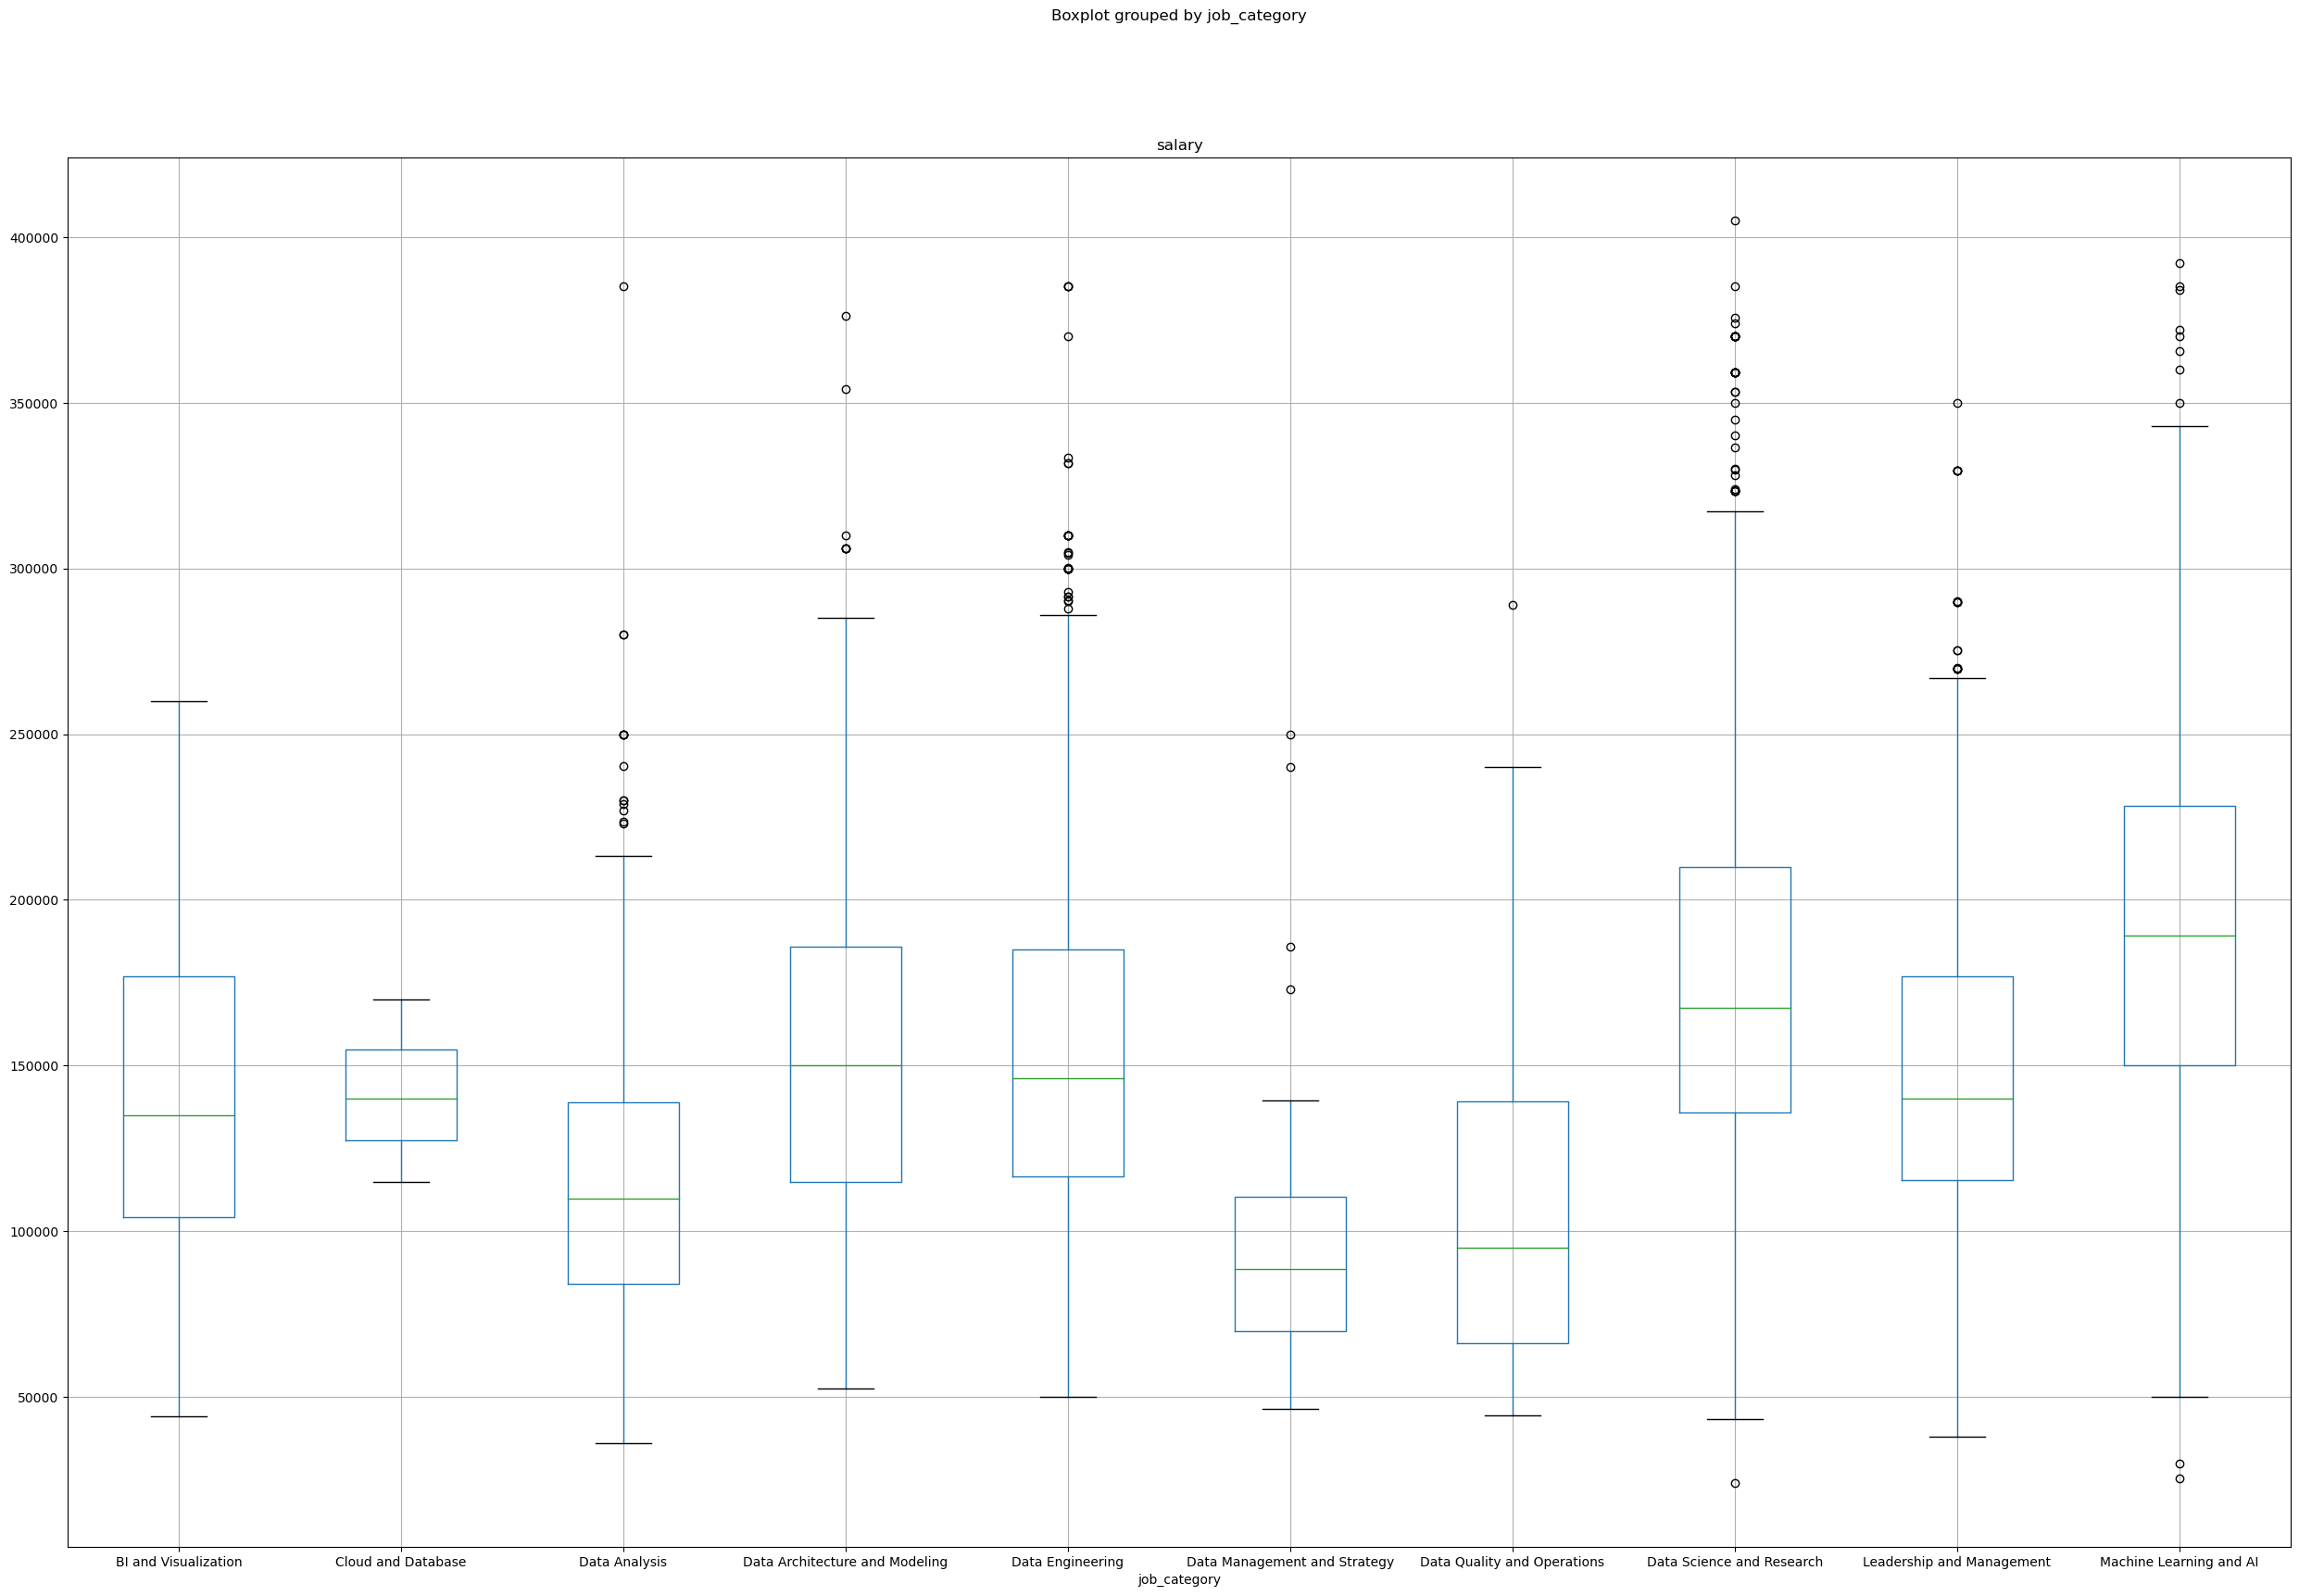

In [18]:
#BM - Visualization for All Salary Information

ER_Data.boxplot("salary", by="job_category", figsize=(30, 20))

### Salaries and Company Size

In [19]:
# (BTP)
# Assuming 'company_size' is the column containing the sizes of the companies

# Load the CSV file into a DataFrame
Jobs_in_data = pd.read_csv('jobs_in_data.csv')

# Count the occurrences of each category in the 'company_size' column
size_counts = Jobs_in_data['company_size'].value_counts()

# Calculate the proportion of each category
proportions = size_counts / size_counts.sum()

# Display the proportions
print("Proportion of companies by size:")
print(proportions)


Proportion of companies by size:
M    0.903046
L    0.079957
S    0.016996
Name: company_size, dtype: float64


In [21]:
# (BTP)
# Calculate the mean salary for each group
mean_salary_by_size = Jobs_in_data.groupby('company_size')['salary'].mean()

# Find the company size with the highest salary
max_salary_company_size = mean_salary_by_size.idxmax()
max_salary = mean_salary_by_size.max()

# Find the company size with the lowest salary
min_salary_company_size = mean_salary_by_size.idxmin()
min_salary = mean_salary_by_size.min()

# Print the results
print("Company size with the highest salary:", max_salary_company_size)
print("Highest salary:", max_salary)
print()
print("Company size with the lowest salary:", min_salary_company_size)
print("Lowest salary:", min_salary)


Company size with the highest salary: M
Highest salary: 151623.60771780304

Company size with the lowest salary: S
Lowest salary: 92666.54716981133


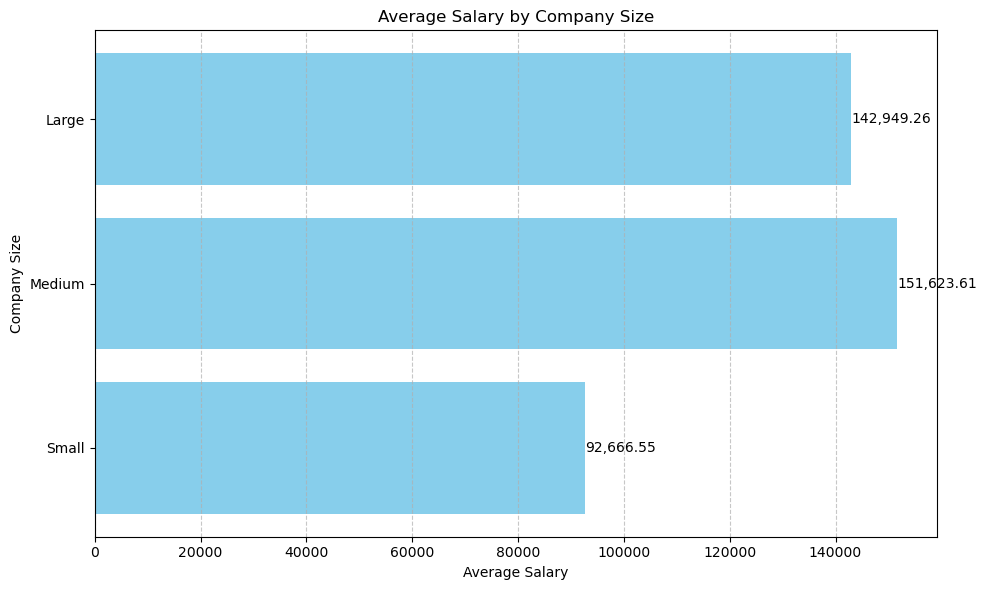

In [23]:
# (BTP)
# Define numerical values for each company size category
company_size_mapping = {'S': 1, 'M': 2, 'L': 3}

# Convert the 'company_size' column to numerical values using the mapping
Jobs_in_data['company_size_numeric'] = Jobs_in_data['company_size'].map(company_size_mapping)

# Calculate the mean salary for each group
mean_salary_by_size = Jobs_in_data.groupby('company_size_numeric')['salary'].mean()

# Plotting a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(mean_salary_by_size.index, mean_salary_by_size, color='skyblue')  # <-- Use barh to create horizontal bars

# Add labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.2f}', ha='left', va='center')

plt.title('Average Salary by Company Size')
plt.xlabel('Average Salary')
plt.ylabel('Company Size')
plt.yticks(ticks=mean_salary_by_size.index, labels=['Small', 'Medium', 'Large'])  # <-- Set the tick labels
plt.grid(axis='x', linestyle='--', alpha=0.7)  # <-- Grid on x-axis
plt.tight_layout()
plt.show()

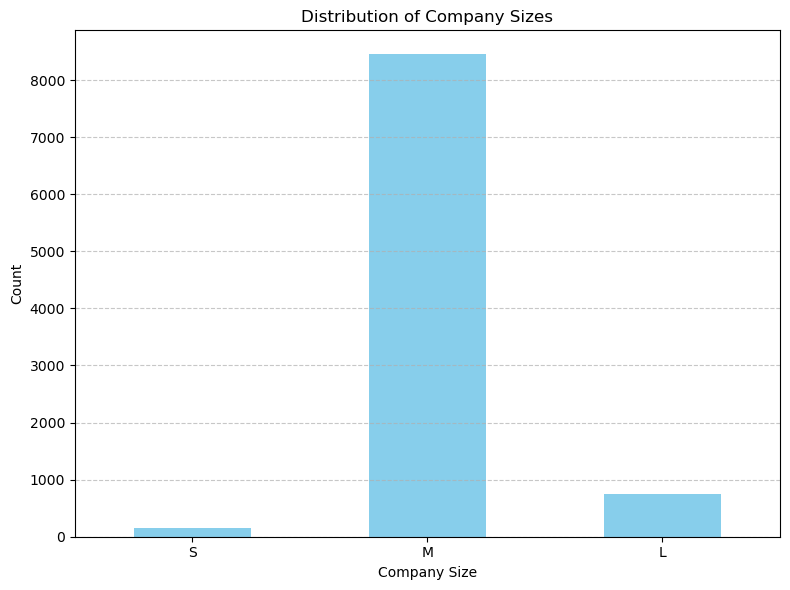

In [24]:
# (BTP)
# Load the CSV file into a DataFrame
jobs_in_data = pd.read_csv('jobs_in_data.csv')

# Count the occurrences of each category in the 'company_size' column
size_counts = jobs_in_data['company_size'].value_counts()

# Reorder the size_counts Series index to 'S', 'M', 'L'
size_counts = size_counts.reindex(['S', 'M', 'L'])

# Plotting a bar graph
plt.figure(figsize=(8, 6))
size_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grid on y-axis
plt.tight_layout()
plt.show()



### Salaries and Experience Level

In [28]:
# (MM) - What is the avg salary based on experience level?

# grouping by experience level
exp_lvl = ER_Data.groupby('experience_level')

# finding the average salary for each experience level
avg_sal = exp_lvl['salary'].mean()

# display average salaries
print("Average Salary for each Experience Level\n",avg_sal)

Average Salary for each Experience Level
 experience_level
Entry-level    105290.338776
Executive      192222.156863
Mid-level      131201.846085
Senior         168754.329718
Name: salary, dtype: float64


In [29]:
# (MM) - Find the Max/Min salary for each experience level.

# finding the max salary 
max_sal = exp_lvl['salary'].max()

# finding the min salary
min_sal = exp_lvl['salary'].min()

# display the max and min salaries
print("Maximum Salary for each Experience Level\n",max_sal)
print("===================")
print("Minimum Salary for each Experience Level\n",min_sal)

Maximum Salary for each Experience Level
 experience_level
Entry-level    281700
Executive      375500
Mid-level      405000
Senior         392000
Name: salary, dtype: int64
Minimum Salary for each Experience Level
 experience_level
Entry-level    24000
Executive      55000
Mid-level      25500
Senior         38000
Name: salary, dtype: int64


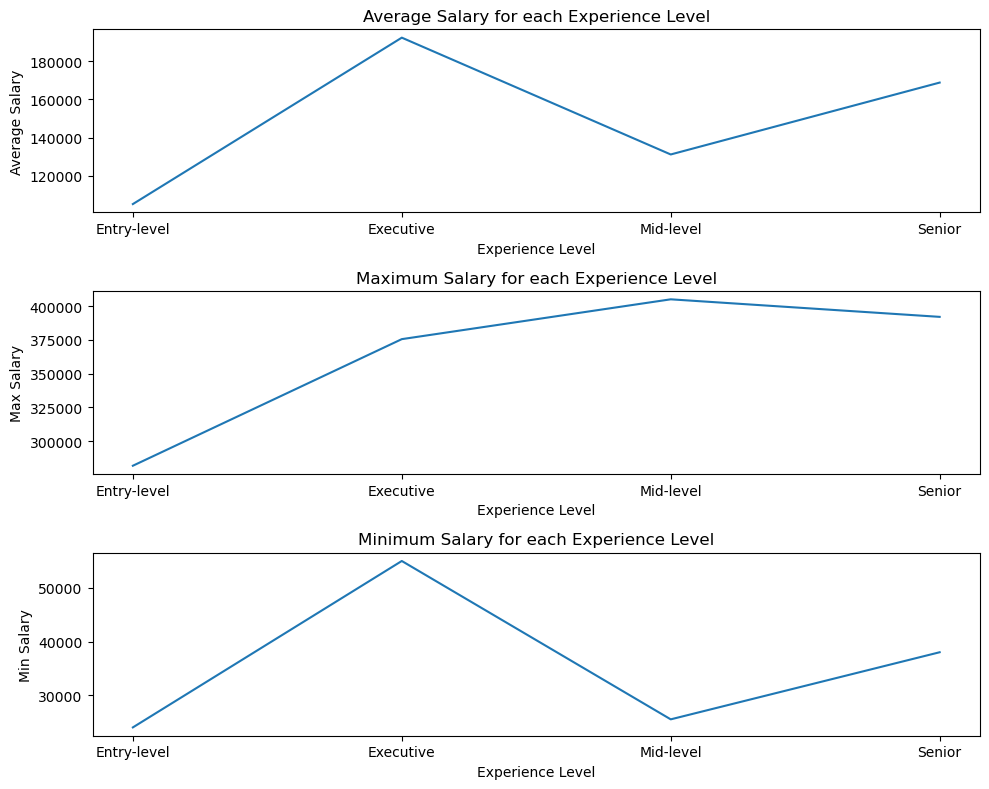

In [30]:
# (MM)

# Visualization: Line Graphs
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(10,8))

# First Plot: Average Salaries
ax1.plot(avg_sal)

# Label Plot
ax1.set_title("Average Salary for each Experience Level")
ax1.set_xlabel("Experience Level")
ax1.set_ylabel("Average Salary")

# Second Plot: Max Salary
ax2.plot(max_sal)

# Label Plot
ax2.set_title("Maximum Salary for each Experience Level")
ax2.set_xlabel("Experience Level")
ax2.set_ylabel("Max Salary")

# Third Plot: Min Salary
ax3.plot(min_sal)

# Label Plot
ax3.set_title("Minimum Salary for each Experience Level")
ax3.set_xlabel("Experience Level")
ax3.set_ylabel("Min Salary")

fig.tight_layout()
plt.show()


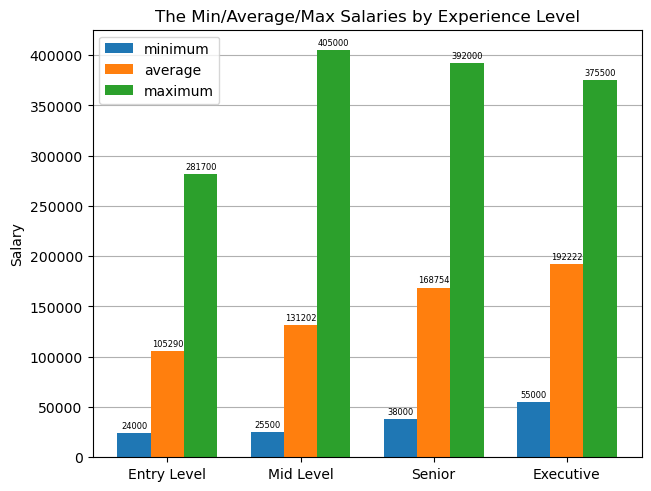

In [31]:
# (MM)

stats_results = {
                'minimum': [24000.000000, 25500.000000, 38000.000000, 55000.000000],
                'average': [105290.338776, 131201.846085, 168754.329718, 192222.156863],
                'maximum': [281700.000000, 405000.000000, 392000.000000, 375500.000000]
}

order = ['Minimum', 'Average', 'Maximum']
levels = ['Entry Level', 'Mid Level', 'Senior', 'Executive']

# Visualization: Bar Graphs
fig, ax = plt.subplots(layout='constrained')

x = np.arange(len(levels))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

for level, stat in stats_results.items():
    offset = width * multiplier
    barplot = ax.bar(x + offset, stat, width, label=level)
    ax.bar_label(barplot, padding=2, fontsize=6)
    multiplier += 1

# Add labels
ax.set_ylabel('Salary')
ax.set_title('The Min/Average/Max Salaries by Experience Level')
ax.set_xticks(x + width, levels)
ax.legend(loc='upper left')
ax.set(axisbelow=True)

plt.grid(axis='y')
plt.show()

Distribution of Each Level
 Senior         5071
Mid-level      1124
Entry-level     245
Executive       204
Name: experience_level, dtype: int64


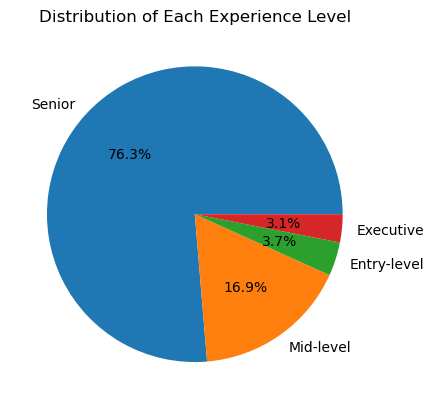

In [32]:
# (MM)
# Visualization: Pie Chart - Proportion of Experience Level

# Count for each Portion
exp_lvl_count = ER_Data['experience_level'].value_counts()
print("Distribution of Each Level\n",exp_lvl_count)

# Plot
pie_labels = ['Senior', 'Mid-level', 'Entry-level', 'Executive']

plt.pie(exp_lvl_count, labels = pie_labels, autopct='%1.1f%%')
plt.title("Distribution of Each Experience Level")
plt.show()

In [33]:
# (MM) - Breakdown of each Experience Level within each Job Title

# Grab only needed columns
jb_explvl_sal = ER_Data[['job_title','experience_level','salary']]
jb_explvl_sal.head()

job_title experience_level  salary
1  Data Architect           Senior  186000
2  Data Architect           Senior   81800
3  Data Scientist           Senior  212000
4  Data Scientist           Senior   93300
5  Data Scientist           Senior  130000

In [34]:
# (MM)

# Find the average salaries for all job titles grouped by experience level
mean_sals = jb_explvl_sal.groupby(['experience_level','job_title'])['salary'].mean()

print(mean_sals)

experience_level  job_title               
Entry-level       AI Developer                130000.000000
                  Analytics Engineer          112412.500000
                  Applied Scientist           178367.500000
                  BI Data Engineer             60000.000000
                  BI Developer                100650.000000
                                                  ...      
Senior            Principal Data Scientist    177500.000000
                  Research Analyst            122965.944444
                  Research Engineer           196289.645833
                  Research Scientist          195585.535714
                  Software Data Engineer      210000.000000
Name: salary, Length: 155, dtype: float64


In [35]:
# (MM)

# Create the groupby series as a dataframe
df = mean_sals.to_frame()
df

salary
experience_level job_title                              
Entry-level      AI Developer              130000.000000
                 Analytics Engineer        112412.500000
                 Applied Scientist         178367.500000
                 BI Data Engineer           60000.000000
                 BI Developer              100650.000000
...                                                  ...
Senior           Principal Data Scientist  177500.000000
                 Research Analyst          122965.944444
                 Research Engineer         196289.645833
                 Research Scientist        195585.535714
                 Software Data Engineer    210000.000000

[155 rows x 1 columns]

In [36]:
# (MM)

df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 155 entries, ('Entry-level', 'AI Developer') to ('Senior', 'Software Data Engineer')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   salary  155 non-null    float64
dtypes: float64(1)
memory usage: 2.3+ KB


In [37]:
# (MM)

# Pull each index and make them columns
df = df.reset_index(level=['experience_level','job_title'])

# rename column 'salary'
df = df.rename(columns={'salary':'mean_salary'})

# sort the mean salary column in descending order
df = df.sort_values(['mean_salary'], ascending=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 138 to 121
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   experience_level  155 non-null    object 
 1   job_title         155 non-null    object 
 2   mean_salary       155 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


In [38]:
# (MM)

# Grab top 5 average paying job titles in entry level
entry_lvl = df[(df['experience_level']=='Entry-level')].head(5)
entry_lvl

experience_level                  job_title    mean_salary
8       Entry-level   Computer Vision Engineer  220000.000000
2       Entry-level          Applied Scientist  178367.500000
22      Entry-level         Research Scientist  170482.105263
18      Entry-level  Machine Learning Engineer  154540.500000
21      Entry-level          Research Engineer  145000.000000

In [39]:
# (MM)

# Grab top 5 average paying job titles in mid level
mid_lvl = df[(df['experience_level']=='Mid-level')].head(5)
mid_lvl

experience_level                                 job_title  mean_salary
44        Mid-level                        AWS Data Architect     258000.0
78        Mid-level                  Director of Data Science     204500.0
84        Mid-level  Machine Learning Infrastructure Engineer     188760.0
87        Mid-level        Machine Learning Software Engineer     181300.0
61        Mid-level              Data Infrastructure Engineer     180827.5

In [40]:
# (MM)

# Grab top 5 average paying job titles in senior level
senior_lvl = df[(df['experience_level']=='Senior')].head(5)
senior_lvl

experience_level               job_title    mean_salary
138           Senior  Deep Learning Engineer  307710.000000
91            Senior            AI Architect  253454.545455
140           Senior            Head of Data  242500.000000
141           Senior             ML Engineer  229796.693548
128           Senior    Data Science Manager  223719.071429

In [41]:
# (MM)

# Grab top 5 average paying job titles in executive level
exec_lvl = df[(df['experience_level']=='Executive')].head(5)
exec_lvl

experience_level                          job_title    mean_salary
38        Executive               Head of Data Science  267475.000000
39        Executive           Head of Machine Learning  259000.000000
36        Executive           Director of Data Science  256181.428571
37        Executive                       Head of Data  255441.176471
24        Executive  Applied Machine Learning Engineer  225000.000000

In [42]:
# (MM)

# Combine all 4 dataframes
merged_df = pd.merge(pd.merge(pd.merge(entry_lvl, mid_lvl, how='outer'), senior_lvl, how='outer'), exec_lvl, how='outer')
merged_df


experience_level                                 job_title    mean_salary
0       Entry-level                  Computer Vision Engineer  220000.000000
1       Entry-level                         Applied Scientist  178367.500000
2       Entry-level                        Research Scientist  170482.105263
3       Entry-level                 Machine Learning Engineer  154540.500000
4       Entry-level                         Research Engineer  145000.000000
5         Mid-level                        AWS Data Architect  258000.000000
6         Mid-level                  Director of Data Science  204500.000000
7         Mid-level  Machine Learning Infrastructure Engineer  188760.000000
8         Mid-level        Machine Learning Software Engineer  181300.000000
9         Mid-level              Data Infrastructure Engineer  180827.500000
10           Senior                    Deep Learning Engineer  307710.000000
11           Senior                              AI Architect  253454.545455
12           Senior                              Head of Data  242500.000000
13           Senior                               ML Engineer  229796.693548
14           Senior                      Data Science Manager  223719.071429
15        Executive                      Head of Data Science  267475.000000
16        Executive                  Head of Machine Learning  259000.000000
17        Executive                  Director of Data Science  256181.428571
18        Executive                              Head of Data  255441.176471
19        Executive         Applied Machine Learning Engineer  225000.000000

### Salaries and Job Titles/Categories

In [43]:
# SA
# Salary and Job Titles/Categories 
# In this section we will be answering the following questions:
# What is the average salary of someone working in the various job titles listed in the dataset?
# What is the average salary of someone working in the various job categories listed in the dataset?
# Which job has the highest pay within each category?
# Within each job category, what is the proportion of entry-level, mid-level, senior-level and executives?


In [44]:
# SA - Question 1: What is the average salary based on job title?
# First let's just count the number of job types
job_title_count= ER_Data['job_title'].value_counts()

# Now lets print the number of unique job types and view it.
num_job_types= len(job_title_count)
print(f'The total number of job types: {num_job_types}')

# Next lets get the list of job titles and their proportions as a percentage
job_proportions = job_title_count / len(ER_Data) * 100
print(job_proportions)


The total number of job types: 79
Data Engineer                         22.621915
Data Scientist                        20.499699
Data Analyst                          14.539434
Machine Learning Engineer             11.754967
Applied Scientist                      3.792896
                                        ...    
AWS Data Architect                     0.015051
Product Data Analyst                   0.015051
Lead Data Analyst                      0.015051
BI Data Engineer                       0.015051
Applied Machine Learning Scientist     0.015051
Name: job_title, Length: 79, dtype: float64


In [45]:
# SA - Grouping the Data by job title and calculating the mean salary of all the jobs in the dataset

mean_salary_by_job= ER_Data.groupby('job_title')['salary'].mean()
mean_salary_by_job

job_title
AI Architect              253454.545455
AI Developer              182285.714286
AI Engineer               193594.444444
AWS Data Architect        258000.000000
Analytics Engineer        159729.079545
                              ...      
Product Data Analyst       83200.000000
Research Analyst          101687.484848
Research Engineer         188615.920635
Research Scientist        190214.034335
Software Data Engineer    210000.000000
Name: salary, Length: 79, dtype: float64

In [46]:
# SA - just grouping it to get the head 

top_5_salaries= mean_salary_by_job.nlargest(5)
top_5_salaries


job_title
Head of Data Science        267475.000000
Head of Machine Learning    259000.000000
AWS Data Architect          258000.000000
Head of Data                254078.947368
AI Architect                253454.545455
Name: salary, dtype: float64

In [47]:
# Grouping the Data by job title and calculating the median salary of all the jobs in the dataset
median_salary_by_job= ER_Data.groupby('job_title')['salary'].median()
median_salary_by_job
# Now we want to filter it to only include the top proportion of job titles. 

top_job_titles= ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Applied Scientist']
filtered_ER_Data= ER_Data[ER_Data['job_title'].isin(top_job_titles)]

# Just checking the median, too, to compare. 
median_salary_top_jobs= filtered_ER_Data.groupby('job_title')['salary'].median()
median_salary_top_jobs

# Let's see the mean of the most popular job titles.

mean_salary_top_jobs= filtered_ER_Data.groupby('job_title')['salary'].mean()
mean_salary_top_jobs


job_title
Applied Scientist            191591.575397
Data Analyst                 114290.582816
Data Engineer                155378.353293
Data Scientist               170201.761380
Machine Learning Engineer    195183.654289
Name: salary, dtype: float64

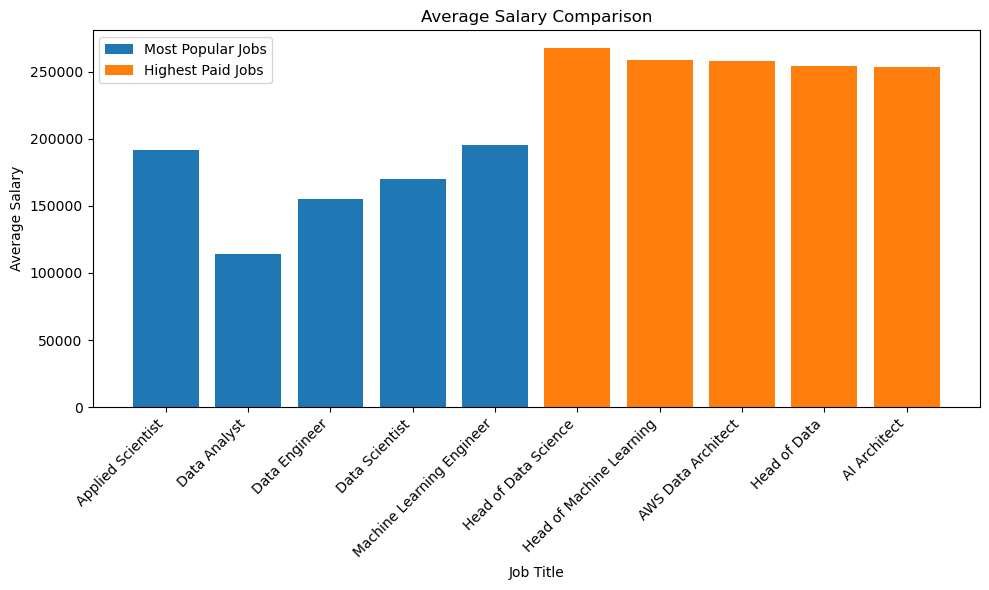

In [48]:
# Sarah A Visualization

plt.figure(figsize=(10,6))
plt.bar(mean_salary_top_jobs.index, mean_salary_top_jobs.values, label= 'Most Popular Jobs')
plt.bar( top_5_salaries.index, top_5_salaries.values, label= 'Highest Paid Jobs')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.title('Average Salary Comparison')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [50]:
# SA - Question 2: What is the average salary of someone working in the various job categories listed in the dataset?

# This will be very similar to our last calculations, except now for the job category. 
job_cat_count= ER_Data['job_category'].value_counts()

num_job_categories= len(job_title_count)
print(f'The total number of job categories: {num_job_types}')

job_cat_props = job_cat_count / len(ER_Data) * 100
print(job_cat_props)
# Now let's calculate the mean and median salaries of all job categories

mean_salary_by_job_cat= ER_Data.groupby('job_category')['salary'].mean()
mean_salary_by_job_cat

median_salary_by_job_cat= ER_Data.groupby('job_category')['salary'].median()
median_salary_by_job_cat

# Finally, let's filter it based on the top 5 largest job categories

top_job_cats= ['Data Science and Research', 'Data Engineering', 'Machine Learning and AI', 'Data Analysis', 'Leadership and Management']
filtered_jc= ER_Data[ER_Data['job_category'].isin(top_job_cats)]

mean_top_jc= filtered_jc.groupby('job_category')['salary'].mean()
mean_top_jc

The total number of job categories: 79
Data Science and Research         32.796508
Data Engineering                  22.983143
Machine Learning and AI           15.577965
Data Analysis                     14.674895
Leadership and Management          5.553883
BI and Visualization               4.289585
Data Architecture and Modeling     2.844672
Data Management and Strategy       0.662252
Data Quality and Operations        0.571945
Cloud and Database                 0.045154
Name: job_category, dtype: float64


job_category
Data Analysis                114117.336410
Data Engineering             155495.199738
Data Science and Research    176050.124369
Leadership and Management    148734.590786
Machine Learning and AI      195515.944928
Name: salary, dtype: float64

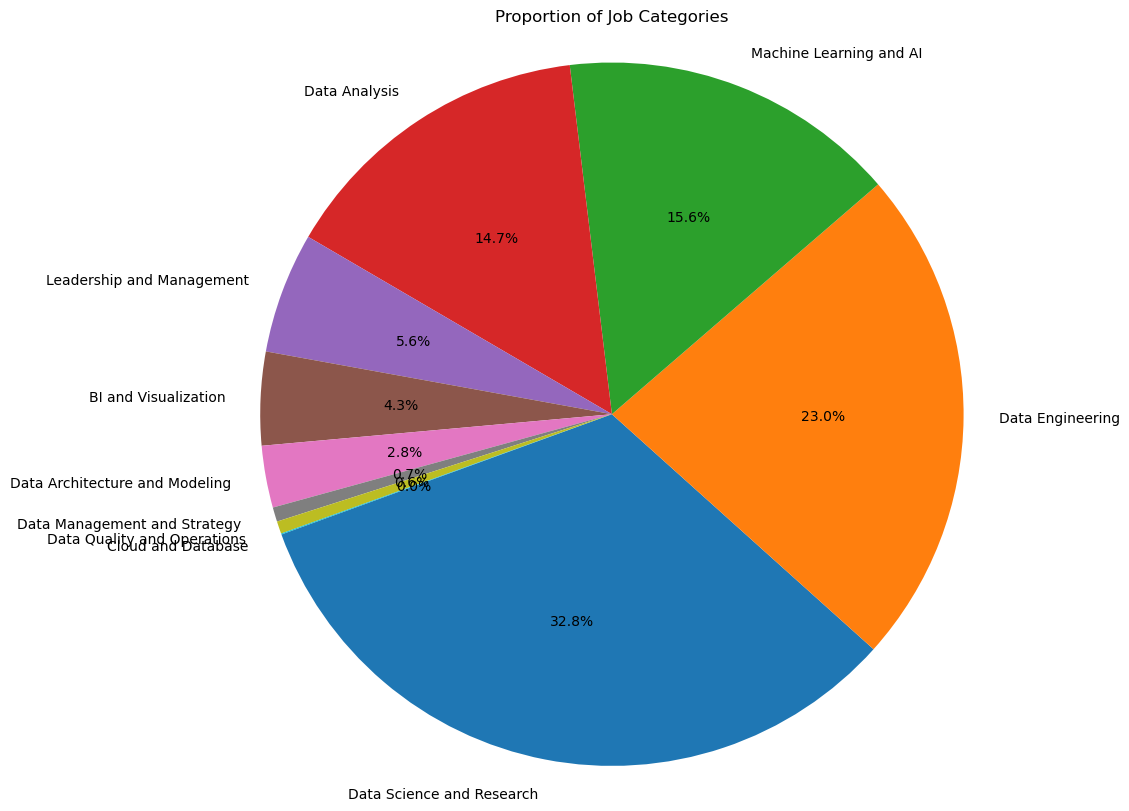

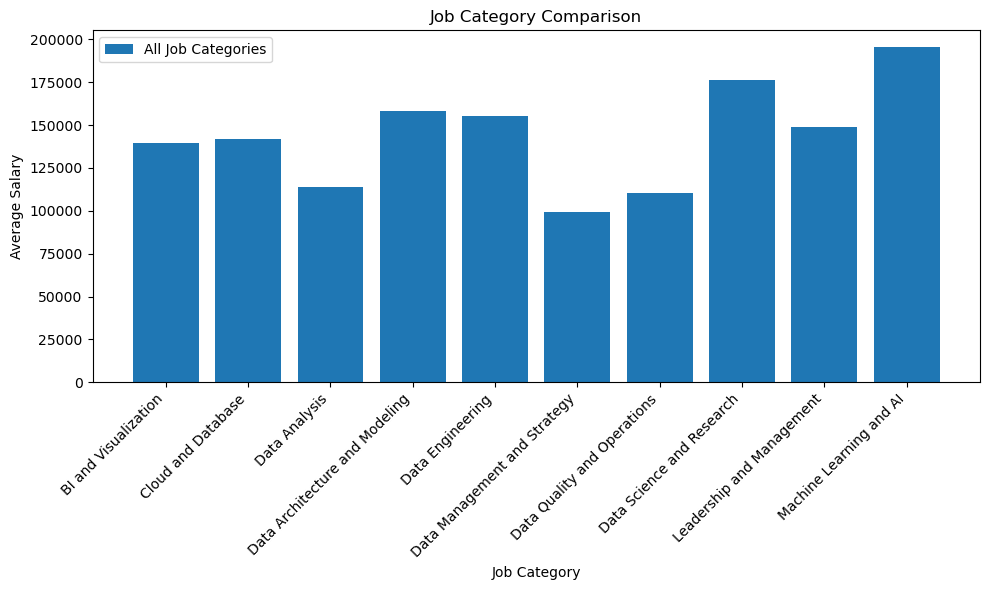

In [51]:
# SA - Leave Space for Visualization
plt.figure(figsize=(10,10))
plt.pie(job_cat_props, labels= job_cat_props.index, autopct='%1.1f%%', startangle=200)
plt.title('Proportion of Job Categories')
plt.axis('equal')
plt.show()

# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(mean_salary_by_job_cat.index, mean_salary_by_job_cat.values, label= 'All Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Average Salary')
plt.title('Job Category Comparison')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [52]:
# SA - Question 3: Which job has the highest pay within the top 5 categories?

#Frequency of each job category
job_cat_count= ER_Data['job_category'].value_counts()
job_cat_count

top_5_cats= job_cat_count.head(5).index.tolist()

# Filtering the DataFrame to include only the top 5 categories
filtered_df = ER_Data[ER_Data['job_category'].isin(top_5_cats)]

# Calculate the average salary for each job title within the top 5 categories
average_salary_by_job_top_categories = filtered_df.groupby('job_title')['salary'].mean()

# Identify the job title with the highest average salary within the top 5 categories
highest_paying_job = average_salary_by_job_top_categories.idxmax()
print(f"The job with the highest pay within the top 5 categories is: {highest_paying_job}")
# Group the DataFrame by job category and job title, then calculate the mean salary
mean_salary_by_category_job = ER_Data.groupby(['job_category', 'job_title'])['salary'].mean().reset_index()

# Find the top-paying job within each category
top_paying_jobs_by_category = mean_salary_by_category_job.loc[mean_salary_by_category_job.groupby('job_category')['salary'].idxmax()]

print(top_paying_jobs_by_category[['job_category', 'job_title', 'salary']])

from tabulate import tabulate
data = {
    'job_category': ['BI and Visualization', 'Cloud and Database', 'Data Analysis', 'Data Architecture and Modeling',
                      'Data Engineering', 'Data Management and Strategy', 'Data Quality and Operations',
                      'Data Science and Research', 'Leadership and Management', 'Machine Learning and AI'],
    'job_title': ['Business Intelligence Engineer', 'Cloud Database Engineer', 'Business Data Analyst',
                  'AWS Data Architect', 'Software Data Engineer', 'Data Strategy Manager', 'Data Operations Engineer',
                  'Head of Data Science', 'Head of Data', 'Head of Machine Learning'],
    'salary': [153187.0, 141666.67, 121000.0, 258000.0, 210000.0, 138750.0, 184987.5, 267475.0, 254078.95, 259000.0]
}

headers = ['Job Category', 'Job Title', 'Salary']
rows = [[data['job_category'][i], data['job_title'][i], data['salary'][i]] for i in range(len(data['job_category']))]

# Print the formatted table
print(tabulate(rows, headers=headers, tablefmt='grid'))

The job with the highest pay within the top 5 categories is: Head of Data Science
                      job_category                       job_title  \
4             BI and Visualization  Business Intelligence Engineer   
10              Cloud and Database         Cloud Database Engineer   
11                   Data Analysis           Business Data Analyst   
18  Data Architecture and Modeling              AWS Data Architect   
27                Data Engineering          Software Data Engineer   
32    Data Management and Strategy           Data Strategy Manager   
34     Data Quality and Operations        Data Operations Engineer   
49       Data Science and Research            Head of Data Science   
61       Leadership and Management                    Head of Data   
69         Machine Learning and AI        Head of Machine Learning   

           salary  
4   153187.000000  
10  141666.666667  
11  121000.000000  
18  258000.000000  
27  210000.000000  
32  138750.000000  
34  184

In [53]:
# SA
from tabulate import tabulate
data = {
    'job_category': ['BI and Visualization', 'Cloud and Database', 'Data Analysis', 'Data Architecture and Modeling',
                      'Data Engineering', 'Data Management and Strategy', 'Data Quality and Operations',
                      'Data Science and Research', 'Leadership and Management', 'Machine Learning and AI'],
    'job_title': ['Business Intelligence Engineer', 'Cloud Database Engineer', 'Business Data Analyst',
                  'AWS Data Architect', 'Software Data Engineer', 'Data Strategy Manager', 'Data Operations Engineer',
                  'Head of Data Science', 'Head of Data', 'Head of Machine Learning'],
    'salary': [153187.0, 141666.67, 121000.0, 258000.0, 210000.0, 138750.0, 184987.5, 267475.0, 254078.95, 259000.0]
}

headers = ['Job Category', 'Job Title', 'Salary']
rows = [[data['job_category'][i], data['job_title'][i], data['salary'][i]] for i in range(len(data['job_category']))]

# Print the formatted table
print(tabulate(rows, headers=headers, tablefmt='grid'))


+--------------------------------+--------------------------------+----------+
| Job Category                   | Job Title                      |   Salary |
+================================+================================+==========+
| BI and Visualization           | Business Intelligence Engineer |   153187 |
+--------------------------------+--------------------------------+----------+
| Cloud and Database             | Cloud Database Engineer        |   141667 |
+--------------------------------+--------------------------------+----------+
| Data Analysis                  | Business Data Analyst          |   121000 |
+--------------------------------+--------------------------------+----------+
| Data Architecture and Modeling | AWS Data Architect             |   258000 |
+--------------------------------+--------------------------------+----------+
| Data Engineering               | Software Data Engineer         |   210000 |
+--------------------------------+------------------